<a href="https://colab.research.google.com/github/babupallam/Machine-Learning-ML-05--Model-Evaluation-and-Performace-Testing/blob/main/05_Model_Selection_and_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Selection and Hyperparameter Tuning

4 Ways

1. Grid Search vs. Random Search
2. Bayesian Optimization (Optional, for Advanced Learners)
3. Model Selection Based on Evaluation Metrics
4. Overfitting Prevention Techniques


# 1. Grid Search vs. Random Search


In machine learning, hyperparameter tuning is a critical step in improving model performance. Hyperparameters are the parameters that define the model's architecture and cannot be learned from the data during training. Selecting the optimal hyperparameters can significantly impact the model’s ability to generalize to new data. Two of the most common techniques for hyperparameter tuning are Grid Search and Random Search.

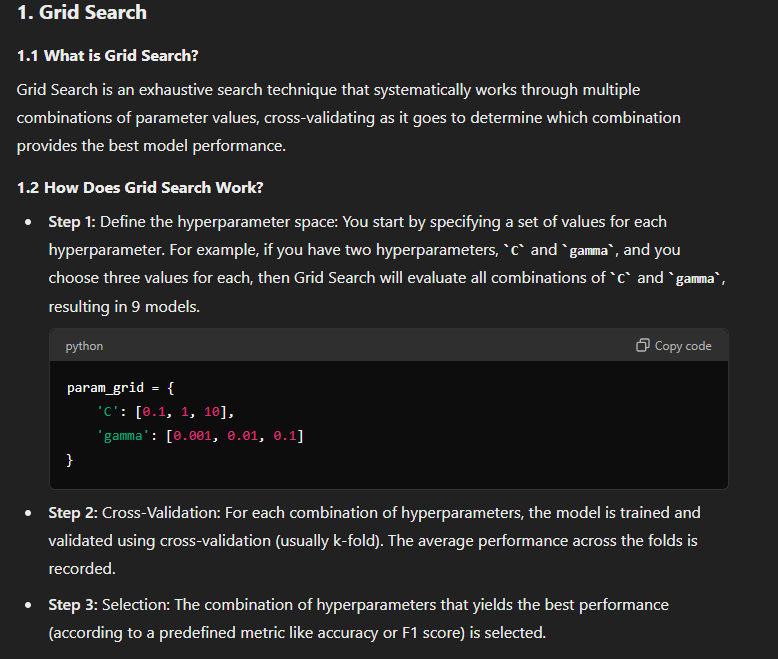

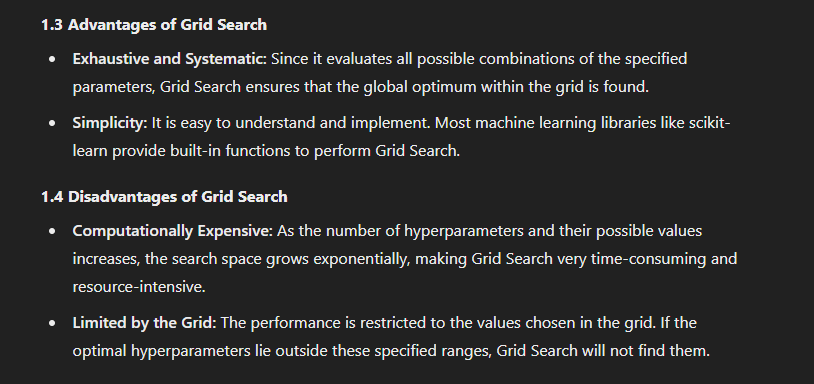

### Implementation Example

In [2]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV  # Tool for performing Grid Search with cross-validation
from sklearn.svm import SVC  # Support Vector Classifier (SVC) model
from sklearn.datasets import load_iris  # Built-in dataset: Iris dataset
from sklearn.model_selection import train_test_split  # Tool to split data into training and testing sets

# Load the Iris dataset
data = load_iris()  # Loads the Iris dataset, which includes features of different iris flower types and their corresponding species

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.2, random_state=42
)
# `data.data` contains the features (sepal length, sepal width, petal length, petal width)
# `data.target` contains the corresponding labels (species of the iris)
# `test_size=0.2` means 20% of the data will be used as the test set, and 80% as the training set
# `random_state=42` ensures that the split is reproducible (i.e., the same split will be obtained each time the code is run)

# Define the SVM model
model = SVC()
# This creates an instance of the Support Vector Classifier (SVC) without any specified hyperparameters.
# SVC is a type of Support Vector Machine (SVM) used for classification tasks.

# Define the grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter; how much you want to avoid misclassifying each training example
    'gamma': [0.001, 0.01, 0.1],  # Kernel coefficient; defines how far the influence of a single training example reaches
    'kernel': ['rbf', 'linear']  # Specifies the kernel type to be used in the algorithm; 'rbf' is the Radial Basis Function kernel, and 'linear' is the linear kernel
}
# The grid includes different values for each hyperparameter. For C, gamma, and kernel, the algorithm will try every possible combination of these values.

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
# `estimator=model` indicates that the SVC model is used.
# `param_grid=param_grid` specifies the hyperparameter combinations to be evaluated.
# `cv=5` specifies 5-fold cross-validation; the data will be split into 5 subsets, and the model will train on 4 and validate on 1, rotating through all subsets.
# `scoring='accuracy'` specifies that accuracy is the metric used to evaluate the model's performance during cross-validation.

# Fit the Grid Search model on the training data
grid_search.fit(X_train, y_train)
# The GridSearchCV object is fitted to the training data (`X_train`, `y_train`).
# The model will go through all combinations of the hyperparameters in `param_grid`, performing 5-fold cross-validation for each combination.
# The model’s performance is evaluated using the accuracy metric, and the best-performing combination of hyperparameters is identified.

# Output the best hyperparameters and the corresponding cross-validation accuracy
print("Best parameters found: ", grid_search.best_params_)
# `grid_search.best_params_` gives the combination of hyperparameters that provided the highest cross-validation accuracy.

print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))
# `grid_search.best_score_` gives the best cross-validation accuracy achieved by the best combination of hyperparameters.
# The accuracy is formatted to two decimal places.

#Output: The best hyperparameters and the corresponding cross-validation accuracy are printed.


Best parameters found:  {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Best cross-validation accuracy: 0.96


This approach is effective for finding the optimal hyperparameters that enhance the model's performance, ensuring that the model generalizes well to unseen data.

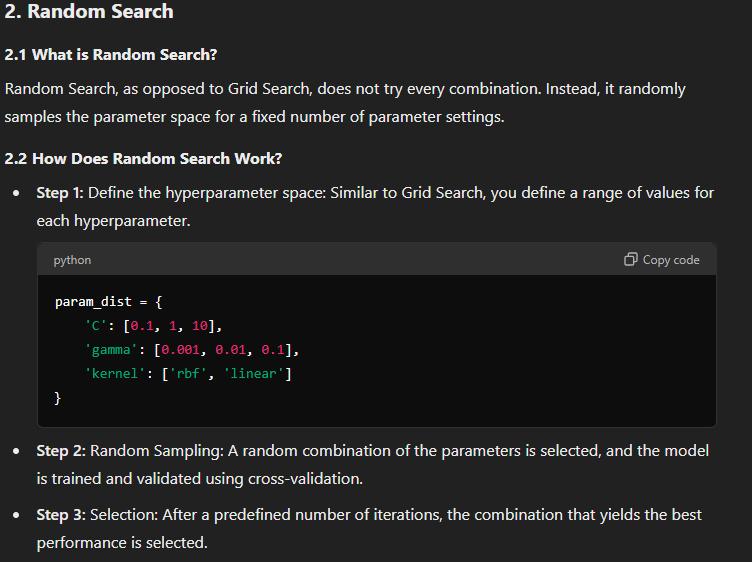

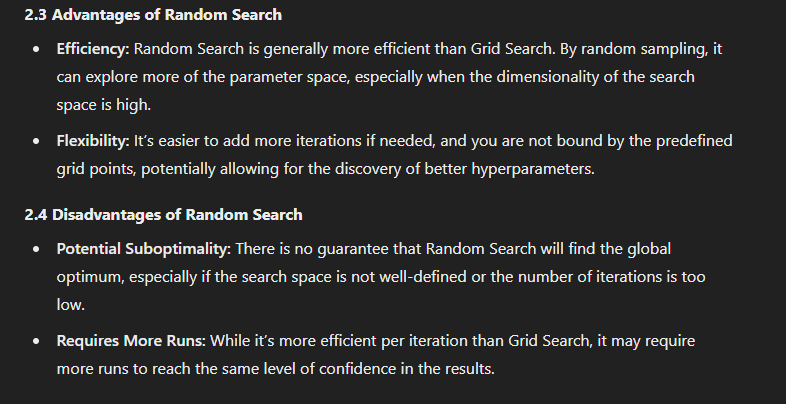

### Example Implementation

In [3]:
# Import necessary libraries from scikit-learn
from sklearn.model_selection import RandomizedSearchCV  # Import RandomizedSearchCV for performing hyperparameter tuning using random search with cross-validation
from sklearn.svm import SVC  # Import Support Vector Classifier (SVC) model, a type of Support Vector Machine for classification tasks
from sklearn.datasets import load_iris  # Import function to load the Iris dataset, a classic dataset used for classification tasks
from sklearn.model_selection import train_test_split  # Import function to split the dataset into training and testing subsets

# Load the Iris dataset
data = load_iris()  # Loads the Iris dataset into the variable `data`
# The Iris dataset contains the following:
# - `data.data`: A 2D array of shape (150, 4) representing the features of 150 samples (each with 4 features: sepal length, sepal width, petal length, and petal width)
# - `data.target`: A 1D array of shape (150,) representing the labels corresponding to each sample (three possible species of iris flowers: setosa, versicolor, virginica)
# - `data.feature_names`: Names of the features
# - `data.target_names`: Names of the target classes (species of iris flowers)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.2, random_state=42
)
# `X_train`, `X_test`: Arrays containing the training and testing features, respectively.
# `y_train`, `y_test`: Arrays containing the corresponding labels for the training and testing sets.
# `test_size=0.2` indicates that 20% of the data (30 samples) will be used for testing, while the remaining 80% (120 samples) will be used for training.
# `random_state=42` ensures reproducibility of the split; the data will be split in the same way every time the code is run.

# Define the SVM model
model = SVC()
# Creates an instance of the Support Vector Classifier (SVC) without specifying any hyperparameters.
# By default, the SVC uses an RBF (Radial Basis Function) kernel, `C=1.0`, and `gamma='scale'`.
# SVC is a powerful classification model that works well on small to medium-sized datasets.

# Define the hyperparameter distribution for random search
param_dist = {
    'C': [0.1, 1, 10],  # Regularization parameter; a lower `C` encourages a larger margin (simpler decision boundary), while a higher `C` penalizes misclassification more (leading to a more complex boundary).
    'gamma': [0.001, 0.01, 0.1],  # Kernel coefficient for RBF; defines the influence of a single training example. Smaller `gamma` values mean the influence reaches far, while larger values mean it is closer.
    'kernel': ['rbf', 'linear']  # Specifies the kernel type; 'rbf' (Radial Basis Function) and 'linear' are the most common kernels used in SVMs. RBF maps input space to higher dimensions to handle non-linear relationships, while a linear kernel is used for linearly separable data.
}
# `param_dist` is a dictionary where the keys are the hyperparameters to be tuned, and the values are lists of possible values that each hyperparameter can take.
# Unlike grid search, random search will sample combinations of these hyperparameters randomly.

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
# `estimator=model` specifies the model to be used in the Randomized Search, which is the SVC defined earlier.
# `param_distributions=param_dist` passes the hyperparameter distribution to the RandomizedSearchCV object.
# `n_iter=10` specifies the number of different combinations of hyperparameters to try; 10 random combinations will be sampled from the defined `param_dist`.
# `cv=5` specifies 5-fold cross-validation; the data will be split into 5 equal parts, where the model trains on 4 parts and validates on the remaining part, rotating through all parts.
# This process reduces the chance of the model overfitting to any particular subset of the data.
# `scoring='accuracy'` specifies that accuracy is the metric used to evaluate the model's performance during cross-validation.
# `random_state=42` ensures reproducibility of the random search; the random sampling of hyperparameter combinations will be the same every time the code is run.

# Fit the Randomized Search model on the training data
random_search.fit(X_train, y_train)
# The RandomizedSearchCV object is fitted to the training data (`X_train`, `y_train`).
# The model will randomly sample 10 different combinations of the hyperparameters from `param_dist`, performing 5-fold cross-validation for each combination.
# The model’s performance is evaluated using the accuracy metric, and the best-performing combination of hyperparameters is identified.

# Output the best hyperparameters and the corresponding cross-validation accuracy
print("Best parameters found: ", random_search.best_params_)
# `random_search.best_params_` gives the combination of hyperparameters that provided the highest cross-validation accuracy.

print("Best cross-validation accuracy: {:.2f}".format(random_search.best_score_))
# `random_search.best_score_` gives the best cross-validation accuracy achieved by the best combination of hyperparameters.
# The accuracy is formatted to two decimal places.


Best parameters found:  {'kernel': 'linear', 'gamma': 0.1, 'C': 1}
Best cross-validation accuracy: 0.96


### 3. Comparison of Grid Search and Random Search


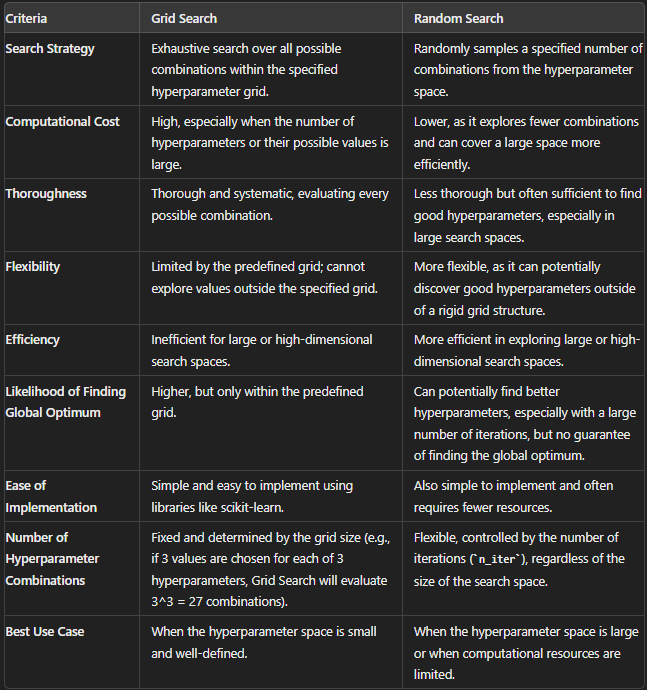



---



---



---



# 2. Bayesian Optimization (Optional, for Advanced Learners)

Bayesian Optimization is a powerful technique for optimizing expensive black-box functions, particularly in the context of hyperparameter tuning for machine learning models. Unlike Grid Search and Random Search, which are brute-force approaches, Bayesian Optimization builds a probabilistic model to predict the performance of different hyperparameter configurations, allowing it to explore the search space more efficiently.

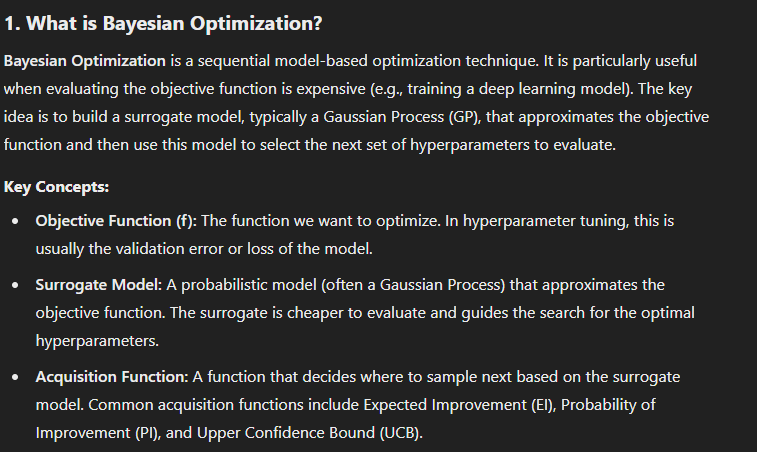

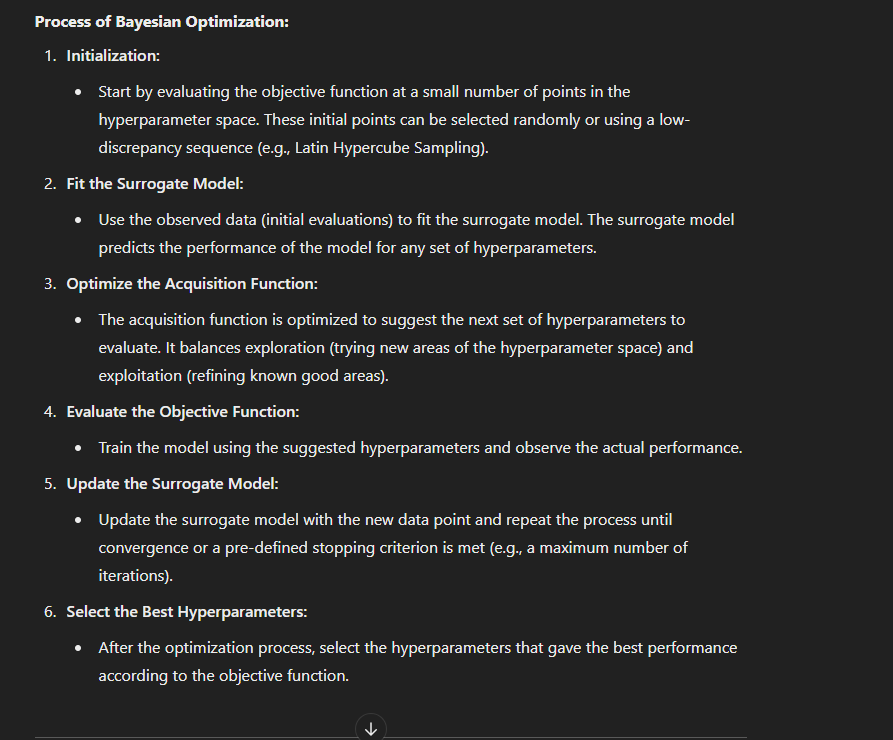

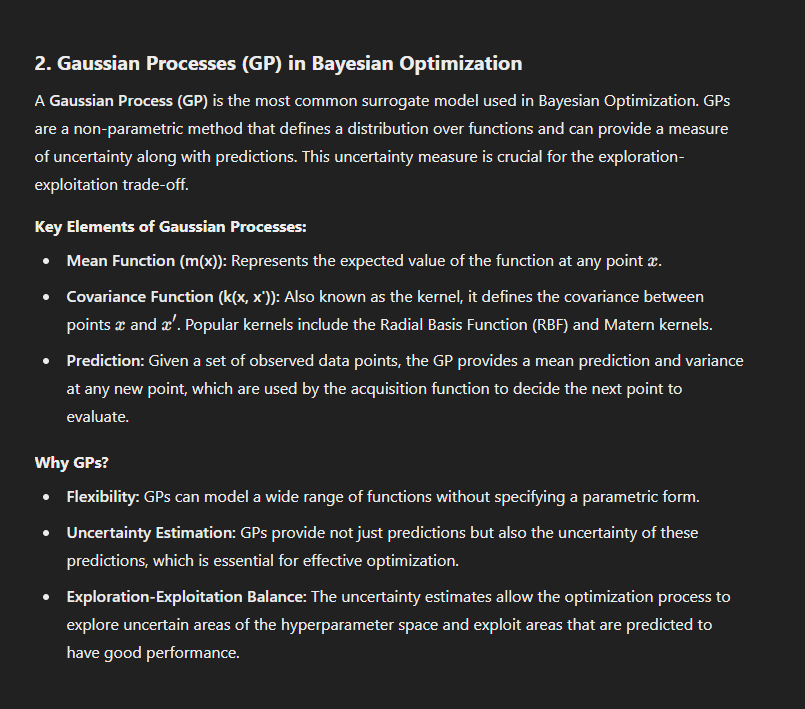

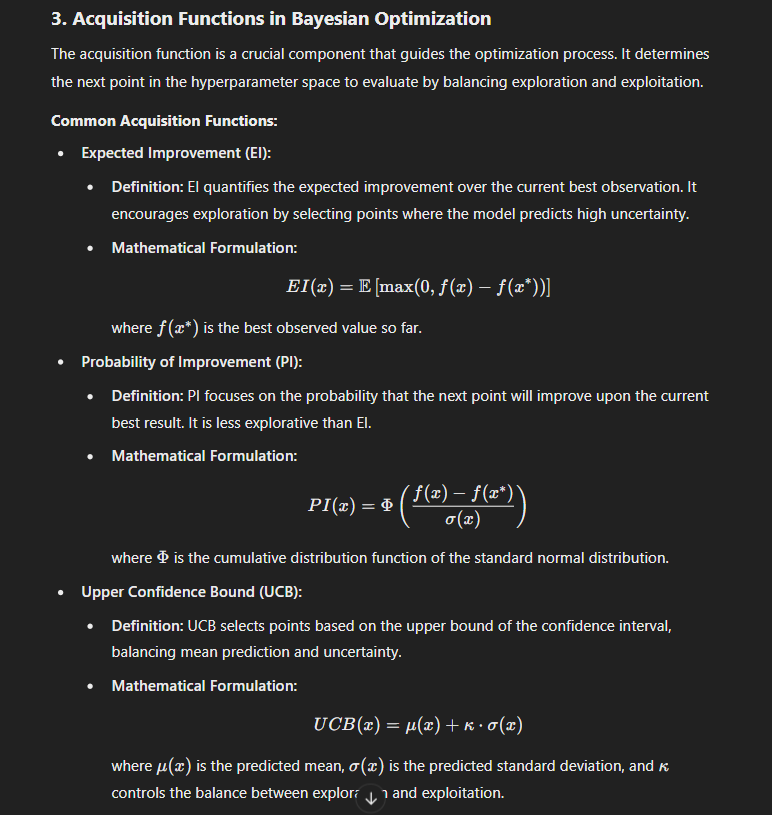

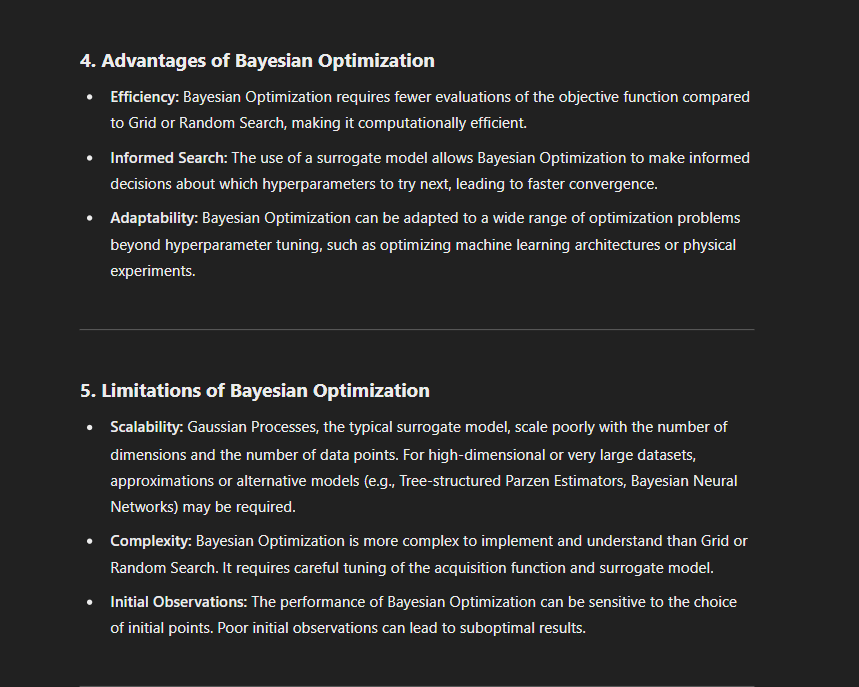

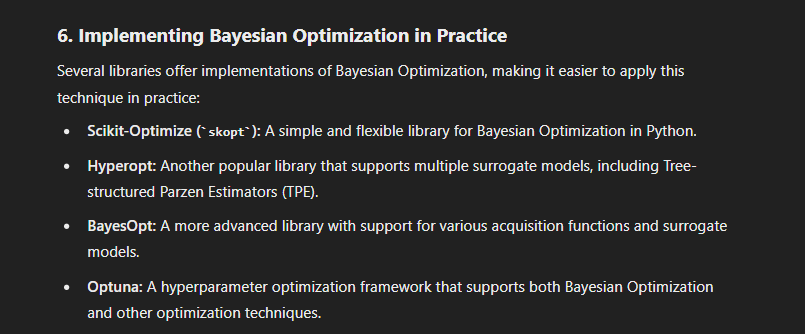

### Implementation Demo

In [4]:
!pip install scikit-optimize # Install the scikit-optimize package which provides the `skopt` module

# Import necessary libraries
from skopt import BayesSearchCV  # BayesSearchCV is the main class for performing Bayesian Optimization with cross-validation
from skopt.space import Real, Integer, Categorical  # Import space definitions for hyperparameter tuning
from sklearn.datasets import load_iris  # Load the Iris dataset for demonstration
from sklearn.svm import SVC  # Support Vector Classifier (SVC) is the model we will tune
from sklearn.model_selection import train_test_split  # Used to split the dataset into training and testing sets


In [5]:

# Load dataset
X, y = load_iris(return_X_y=True)  # Load the Iris dataset, where X is the feature matrix and y is the target vector

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, y_train: training data
# X_test, y_test: testing data
# test_size=0.2: 20% of the data will be used for testing
# random_state=42: Ensures reproducibility of the split

# Define the model we want to optimize
model = SVC()  # SVC (Support Vector Classifier) is a popular machine learning model for classification tasks

# Define the hyperparameter space we want to explore
param_space = {
    'C': Real(1e-6, 1e+6, prior='log-uniform'),  # 'C' is the regularization parameter, sampled logarithmically
    'gamma': Real(1e-6, 1e+1, prior='log-uniform'),  # 'gamma' parameter, sampled logarithmically for RBF kernel
    'degree': Integer(1, 8),  # 'degree' is the degree of the polynomial kernel function ('poly')
    'kernel': Categorical(['linear', 'poly', 'rbf']),  # 'kernel' specifies the kernel type to be used in the SVM
}

# Implement Bayesian Optimization with cross-validation
opt = BayesSearchCV(
    model,  # The model we are optimizing (in this case, SVC)
    param_space,  # The hyperparameter space defined above
    n_iter=32,  # Number of iterations (hyperparameter configurations) to try
    cv=3,  # Number of cross-validation folds to use
    n_jobs=-1  # Use all available CPU cores for computation
)

# Fit the Bayesian Optimization model on the training data
opt.fit(X_train, y_train)
# This step involves running the Bayesian Optimization process, where the model is trained and evaluated multiple times
# using different hyperparameter combinations. The best combination is identified based on cross-validation performance.

# Print the best parameters found during optimization
print("Best parameters: ", opt.best_params_)
# This will output the hyperparameter combination that resulted in the best cross-validation performance

# Evaluate the optimized model on the test set
score = opt.score(X_test, y_test)
# The 'score' method returns the mean accuracy on the given test data and labels

# Print the test set performance
print("Test set score: ", score)
# This will output the accuracy of the best model on the test data, which indicates how well the model generalizes to unseen data

Best parameters:  OrderedDict([('C', 0.9451175644560487), ('degree', 5), ('gamma', 4.2361664035217115e-05), ('kernel', 'linear')])
Test set score:  1.0




---



---



---



# 3. Model Selection Based on Evaluation Metrics


Model selection is a crucial step in the machine learning pipeline. It involves choosing the best-performing model among several candidates based on certain evaluation metrics. The choice of the right model and its evaluation metric directly impacts the model's effectiveness in solving the problem at hand.

#### **Key Concepts in Model Selection**

1. **Evaluation Metrics:**
   - Evaluation metrics are quantitative measures used to assess how well a model performs on a given task. The choice of metric depends on the type of problem (classification, regression, etc.) and the specific goals of the analysis.

2. **Cross-Validation:**
   - Cross-validation is a technique for assessing the generalizability of a model. It involves partitioning the data into training and validation sets multiple times to evaluate the model’s performance. The most common form is k-fold cross-validation, where the data is divided into k subsets, and the model is trained k times, each time leaving out one subset for validation.

3. **Model Comparison:**
   - Once multiple models are trained, they need to be compared based on their performance metrics. This comparison helps in selecting the model that performs best according to the chosen metric.

#### **Evaluation Metrics for Different Types of Problems**

1. **Classification Problems:**
   - **Accuracy:**
   - **Precision:**
   - **Recall (Sensitivity):**
   - **F1-Score:**
   - **AUC-ROC Curve:**

2. **Regression Problems:**
   - **Mean Absolute Error (MAE):**
   - **Mean Squared Error (MSE):**
   - **Root Mean Squared Error (RMSE):**
   - **R-squared (Coefficient of Determination):**

3. **Ranking and Information Retrieval Problems:**
   - **Precision at K:**
   - **Mean Average Precision (MAP):**
   - **NDCG (Normalized Discounted Cumulative Gain):**
   
#### **Cross-Validation Techniques**

1. **k-Fold Cross-Validation:**
   - The dataset is divided into k equal-sized folds. The model is trained k times, each time using k-1 folds for training and the remaining fold for validation. The average performance across all k trials is used as the final performance metric.

2. **Stratified k-Fold Cross-Validation:**
   - Similar to k-fold but ensures that each fold has approximately the same distribution of classes as the entire dataset. This is particularly useful for imbalanced datasets.

3. **Leave-One-Out Cross-Validation (LOOCV):**
   - A special case of k-fold cross-validation where k equals the number of data points. Each observation is used once as a validation set, with the rest used for training. This method is computationally expensive but offers a thorough evaluation.

4. **Time Series Cross-Validation:**
   - In time series data, the temporal order must be preserved. This method involves creating training and validation sets such that all training data precedes the validation data, mimicking how the model would be used in practice.

#### **Model Comparison**

1. **Ranking Models Based on Metrics:**
   - After evaluating multiple models using cross-validation, rank them based on the selected metric(s). For instance, if accuracy is the metric, the model with the highest cross-validation accuracy would be ranked highest.

2. **Model Averaging:**
   - Instead of choosing a single model, sometimes a combination of models (e.g., ensemble methods like bagging or boosting) can lead to better performance. The idea is that combining the strengths of multiple models can reduce the overall error.

3. **Statistical Significance Testing:**
   - After comparing models, it’s crucial to determine if the performance differences are statistically significant. Techniques like paired t-tests or Wilcoxon signed-rank tests can be used to assess if the difference in performance metrics is due to chance or represents a real improvement.

4. **Cost-Benefit Analysis:**
   - In some cases, the choice of a model is influenced not just by performance metrics but also by factors like computational cost, interpretability, or the specific business impact of different types of errors (e.g., false positives vs. false negatives).

#### **Challenges and Best Practices**

1. **Overfitting in Model Selection:**
   - Overfitting can occur if the model is tuned too much to the training data, leading to poor generalization on unseen data. This can be mitigated by using techniques like cross-validation and by choosing simpler models or adding regularization.

2. **Bias-Variance Trade-off:**
   - The choice of model should balance bias and variance. High-bias models (e.g., linear models) might underfit, while high-variance models (e.g., deep neural networks) might overfit. The goal is to find a model with the right balance.

3. **Data Leakage:**
   - Care must be taken to avoid data leakage, where information from outside the training set is used to create the model, leading to overly optimistic performance estimates. Proper data handling and pipeline construction are essential to prevent this.

4. **Interpretability:**
   - In many real-world applications, model interpretability is as important as accuracy. While complex models (e.g., deep learning models) may offer better performance, simpler models (e.g., linear regression, decision trees) are easier to interpret and may be preferred in certain situations.




---



---



---



# 4. Overfitting Prevention Techniques


Overfitting occurs when a machine learning model performs well on the training data but poorly on new, unseen data. This happens because the model has learned not only the underlying patterns but also the noise in the training data. Overfitting is a common issue in machine learning and can lead to models that do not generalize well to new data. To prevent overfitting, several techniques can be employed. Below is a comprehensive study of these techniques.




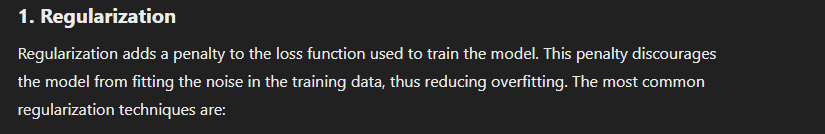

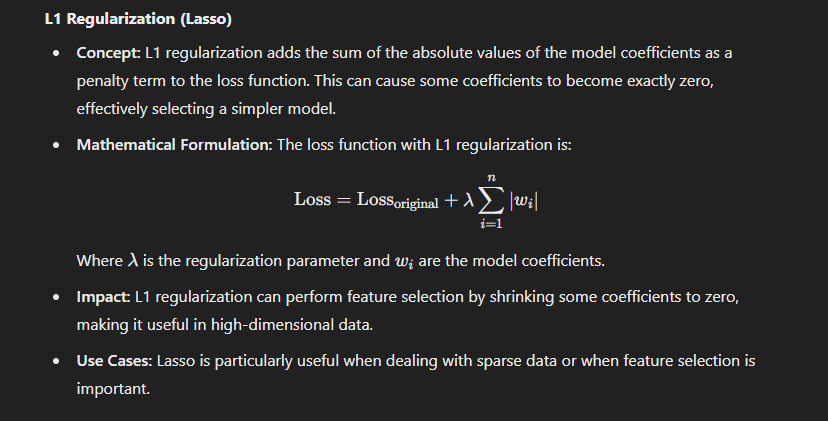

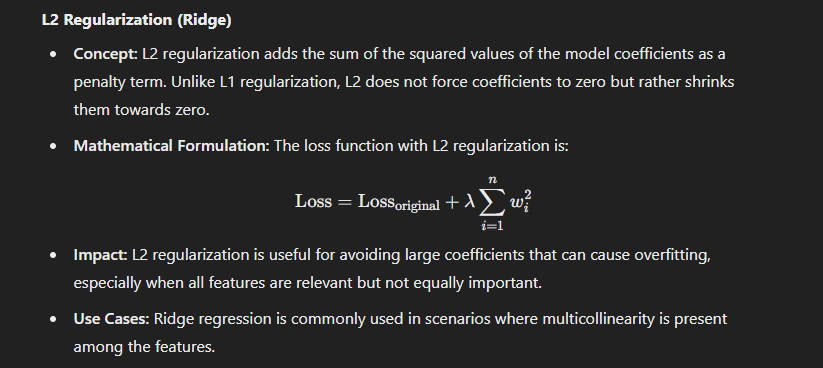

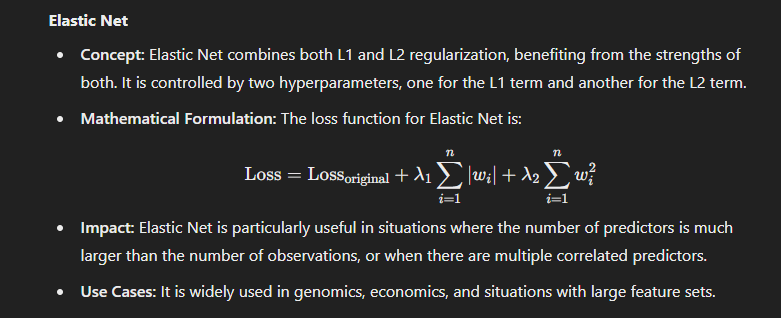

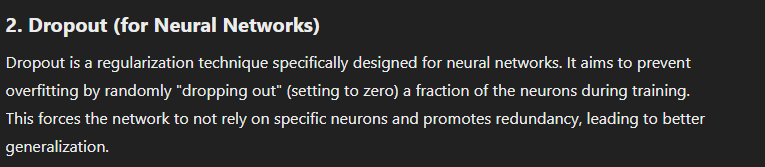

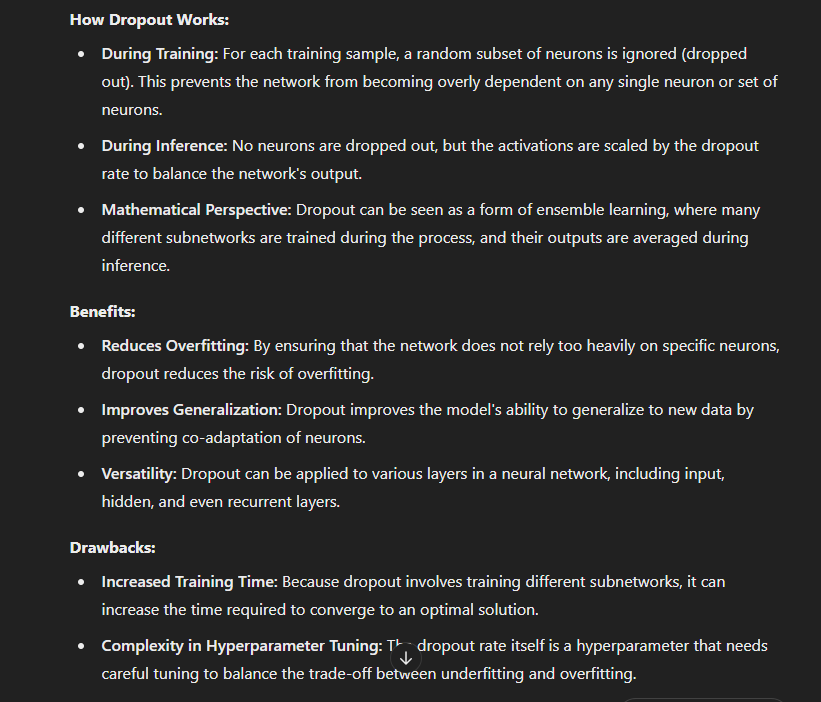

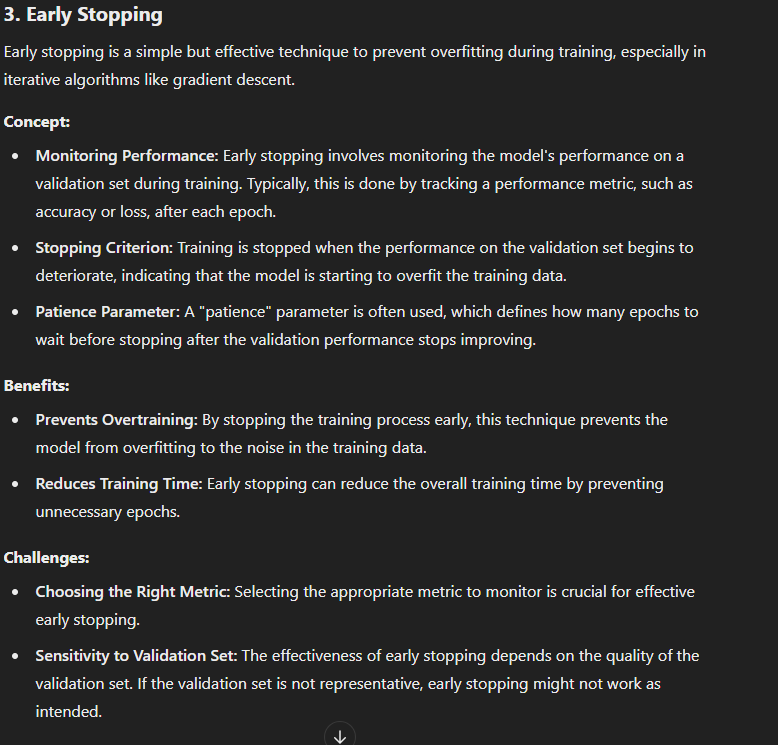

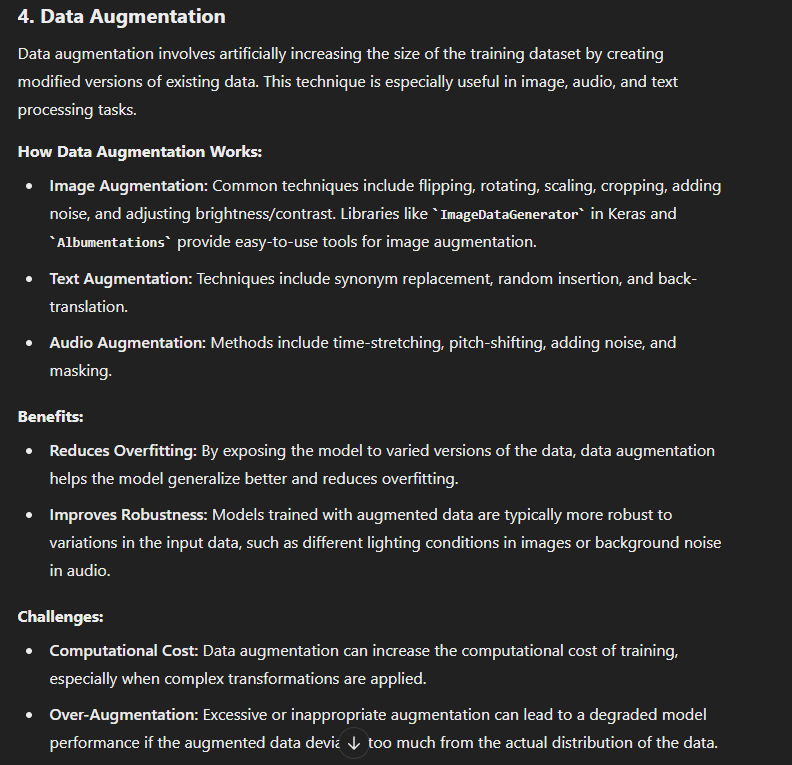

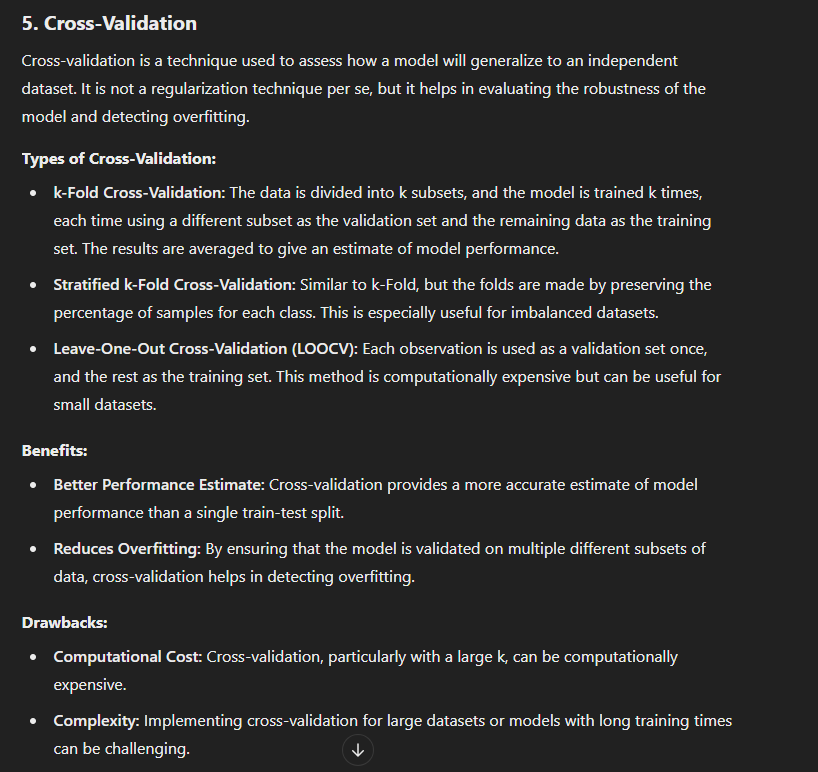

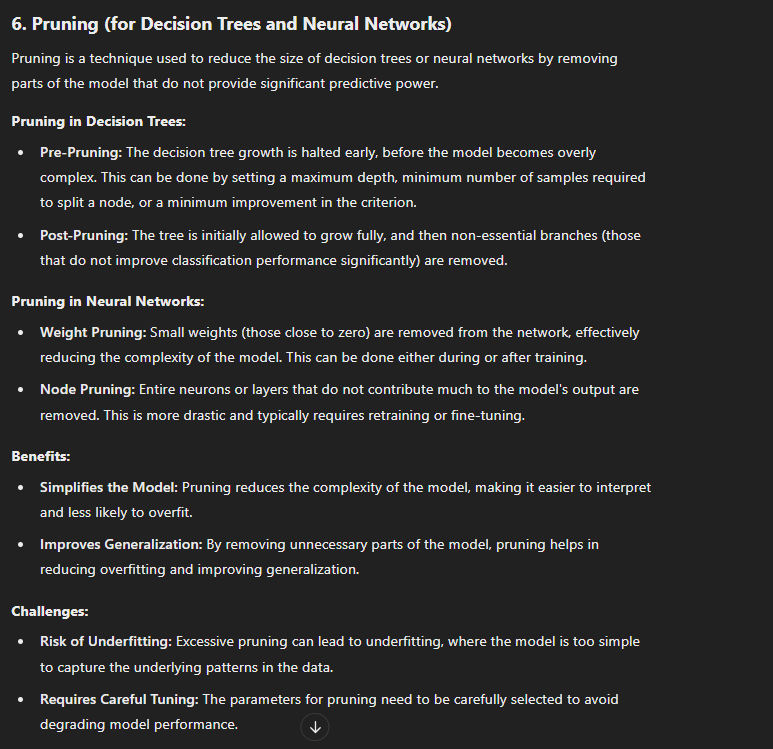

# Example Implementation

#### 1. L2 Regularization with Ridge Regression

The Ridge regression model includes an L2 penalty to prevent overfitting by penalizing large coefficients.



In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply L2 Regularization using Ridge Regression
ridge = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge.fit(X_train, y_train)

# Predict and evaluate
y_pred = ridge.predict(X_test)
accuracy = ridge.score(X_test, y_test)

print(f'Ridge Regression Accuracy: {accuracy:.4f}')


Ridge Regression Accuracy: 0.5824


#### 2. Dropout in a Neural Network

 In the neural network example, a Dropout layer is added to the fully connected layer to randomly drop neurons during training, which helps prevent overfitting.

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with dropout
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 38ms/step - accuracy: 0.7913 - loss: 0.6463 - val_accuracy: 0.9844 - val_loss: 0.0478
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9726 - loss: 0.0980 - val_accuracy: 0.9876 - val_loss: 0.0413
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 38ms/step - accuracy: 0.9805 - loss: 0.0660 - val_accuracy: 0.9890 - val_loss: 0.0378
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9848 - loss: 0.0522 - val_accuracy: 0.9923 - val_loss: 0.0259
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9877 - loss: 0.0455 - val_accuracy: 0.9911 - val_loss: 0.0274
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9899 - loss: 0.0350 - val_accuracy: 0.9913 - val_loss: 0.0263
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9906 - loss: 0.0291 - val_accuracy: 0.9923 - val_loss: 0.0270
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.9921 - loss: 0.0277 - 

#### 3. Early Stopping

 The EarlyStopping callback is used during training to stop training when the validation loss stops improving, helping to avoid overfitting.

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.9952 - loss: 0.0161 - val_accuracy: 0.9921 - val_loss: 0.0334
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9953 - loss: 0.0151 - val_accuracy: 0.9927 - val_loss: 0.0299
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.9954 - loss: 0.0146 - val_accuracy: 0.9922 - val_loss: 0.0358


#### 4. Data Augmentation

The ImageDataGenerator is used to apply random transformations to the training images, increasing the diversity of the data and helping the model generalize better.

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Fit the generator on the training data
datagen.fit(X_train)

# Train the model using augmented data
model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
  1/938 ━━━━━━━━━━━━━━━━━━━━ 11:34 741ms/step - accuracy: 0.8750 - loss: 0.3411

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.9514 - loss: 0.1827 - val_accuracy: 0.9936 - val_loss: 0.0216
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.9741 - loss: 0.0896 - val_accuracy: 0.9939 - val_loss: 0.0193
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 0.9797 - loss: 0.0742 - val_accuracy: 0.9938 - val_loss: 0.0166
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 51ms/step - accuracy: 0.9820 - loss: 0.0649 - val_accuracy: 0.9935 - val_loss: 0.0204
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9843 - loss: 0.0567 - val_accuracy: 0.9941 - val_loss: 0.0215
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.9849 - loss: 0.0581 - val_accuracy: 0.9923 - val_loss: 0.0272
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9853 - loss: 0.0526 - val_accuracy: 0.9940 - val_loss: 0.0194
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 92s 54ms/step - accuracy: 0.9867 - loss: 0.0529 - val_accurac

#### 5. Cross-Validation

A 5-fold cross-validation is performed using logistic regression to ensure that the model's performance is consistent across different subsets of the data.

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Logistic Regression with L2 Regularization (default)
model = LogisticRegression(max_iter=1000)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

print(f'Cross-Validation Accuracy: {scores.mean():.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Accuracy: 0.9121


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 # Implement Grid Search and Random Search for Hyperparameter Tuning

In [12]:
# Dataset Preparation

# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
# Model Selection
from sklearn.svm import SVC



In [14]:
#  Grid Search Implementation

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Initialize the SVM model
svm_model = SVC()

# Perform Grid Search
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found by Grid Search:", grid_search.best_params_)
print("Best cross-validation score achieved by Grid Search:", grid_search.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found by Grid Search: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score achieved by Grid Search: 0.9523809523809523


In [15]:
# Random Search Implementation

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter distribution for Random Search
param_dist = {
    'C': np.logspace(-2, 2, 10),
    'gamma': np.logspace(-3, 1, 10),
    'kernel': ['rbf']
}

# Perform Random Search
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found by Random Search:", random_search.best_params_)
print("Best cross-validation score achieved by Random Search:", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found by Random Search: {'kernel': 'rbf', 'gamma': 0.021544346900318832, 'C': 12.915496650148826}
Best cross-validation score achieved by Random Search: 0.9523809523809523


In [16]:
# Comparison

# Print comparison results
print("Grid Search best parameters:", grid_search.best_params_)
print("Grid Search best score:", grid_search.best_score_)

print("Random Search best parameters:", random_search.best_params_)
print("Random Search best score:", random_search.best_score_)


Grid Search best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Grid Search best score: 0.9523809523809523
Random Search best parameters: {'kernel': 'rbf', 'gamma': 0.021544346900318832, 'C': 12.915496650148826}
Random Search best score: 0.9523809523809523


In [17]:
# Model Evaluation

from sklearn.metrics import classification_report, accuracy_score

# Evaluate the Grid Search best model
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test)
print("Grid Search Test Set Accuracy:", accuracy_score(y_test, y_pred_grid))
print("Classification Report for Grid Search:")
print(classification_report(y_test, y_pred_grid))

# Evaluate the Random Search best model
best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test)
print("Random Search Test Set Accuracy:", accuracy_score(y_test, y_pred_random))
print("Classification Report for Random Search:")
print(classification_report(y_test, y_pred_random))


Grid Search Test Set Accuracy: 1.0
Classification Report for Grid Search:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Random Search Test Set Accuracy: 0.9777777777777777
Classification Report for Random Search:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



- Grid Search exhaustively searches through the specified hyperparameters, finding the best combination, but it is more computationally expensive.

- Random Search samples the hyperparameter space more efficiently, often achieving similar results with less computation.

# Evaluating the Performance of Models Before and After Tuning


In [18]:
# Importing necessary libraries

# NumPy is a fundamental package for scientific computing in Python. It provides support for arrays,
# matrices, and many mathematical functions that operate on these data structures.
# In this script, although we don't use NumPy directly, it is commonly imported as 'np' to provide
# utility functions and to ensure compatibility with libraries that rely on it.
import numpy as np

# Pandas is a powerful data manipulation and analysis library. It provides data structures like
# DataFrames that are essential for handling and analyzing structured data efficiently.
# In this script, it's imported as 'pd' but is not explicitly used in the example.
# However, it's a standard practice to import Pandas for any data-related tasks in Python.
import pandas as pd

# scikit-learn (sklearn) is a machine learning library that provides simple and efficient tools for data mining and analysis.
# Here we import specific modules:
# - `load_iris`: To load the Iris dataset, a classic dataset used for classification.
# - `train_test_split`: To split the dataset into training and testing sets.
# - `GridSearchCV`: To perform an exhaustive search over specified parameter values for an estimator.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV

# Importing the RandomForestClassifier from the ensemble module of scikit-learn.
# Random Forest is an ensemble learning method used for classification (and regression),
# which operates by constructing multiple decision trees during training and outputting the mode of the classes.
from sklearn.ensemble import RandomForestClassifier

# Importing performance evaluation metrics from sklearn's metrics module:
# - `accuracy_score`: To calculate the accuracy of the model predictions.
# - `classification_report`: To generate a report showing the main classification metrics.
# - `confusion_matrix`: To evaluate the accuracy of a classification by comparing the actual and predicted classifications.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [19]:

# ==========================
# Loading and preparing the dataset

# Load the Iris dataset, which is a standard dataset included in scikit-learn.
# It contains 150 samples of iris flowers, with 4 features (sepal length, sepal width, petal length, petal width) and 3 classes (iris species).
iris = load_iris()

# Splitting the dataset into features (X) and target labels (y).
X = iris.data  # Feature matrix containing the four features for each sample.
y = iris.target  # Target vector containing the class labels for each sample.

# Splitting the data into training and testing sets.
# The training set is used to train the model, and the testing set is used to evaluate its performance.
# Here, 70% of the data is used for training, and 30% is used for testing.
# The `random_state=42` ensures that the split is reproducible.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:


# ==========================
# Train the Baseline Model (Before Tuning)

# Initialize the Random Forest model with default parameters.
# The `random_state=42` is set for reproducibility so that the results can be replicated.
rf_baseline = RandomForestClassifier(random_state=42)

# Train the model using the training data.
rf_baseline.fit(X_train, y_train)

# Make predictions on the test set using the trained model.
y_pred_baseline = rf_baseline.predict(X_test)

# Evaluate the model by calculating the accuracy,
# generating a classification report, and creating a confusion matrix.
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Accuracy: {accuracy_baseline:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_baseline))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_baseline))

Baseline Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [21]:

# ==========================
# Hyperparameter Tuning with Grid Search

# Define a grid of hyperparameters to search over.
# Each key in the dictionary corresponds to a hyperparameter of the RandomForestClassifier,
# and the values are lists of parameters to try during the grid search.
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest.
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree.
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node.
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node.
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees.
}

# Initialize the GridSearchCV object with the RandomForestClassifier as the estimator.
# - `param_grid`: The hyperparameter grid defined above.
# - `cv=5`: 5-fold cross-validation is used to evaluate the model performance for each parameter combination.
# - `n_jobs=-1`: Utilizes all available processors to perform the grid search.
# - `verbose=2`: Provides detailed logging information about the grid search process.
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Perform Grid Search to find the best hyperparameters.
grid_search.fit(X_train, y_train)

# Extract the best parameters found by Grid Search and the best model.
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [22]:

# ==========================
# Train the Model with Best Hyperparameters (After Tuning)

# Train the Random Forest model using the best hyperparameters obtained from Grid Search.
best_rf.fit(X_train, y_train)

# Make predictions on the test set using the tuned model.
y_pred_best = best_rf.predict(X_test)

# Evaluate the tuned model by calculating the accuracy,
# generating a classification report, and creating a confusion matrix.
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Tuned Model Accuracy: {accuracy_best:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))



Tuned Model Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [23]:
# ==========================
# Comparison and Overfitting Analysis
#  The performance of the baseline model is compared with the tuned model. Additionally, training accuracy is compared with test accuracy to check for potential overfitting.

# Compare the accuracy of the baseline model and the tuned model.
print(f"Baseline Accuracy: {accuracy_baseline:.4f}")
print(f"Tuned Model Accuracy: {accuracy_best:.4f}")

# Check for overfitting by comparing the training accuracy to the test accuracy.
# A significant difference between the two may indicate that the model is overfitting to the training data.
train_accuracy = best_rf.score(X_train, y_train)
test_accuracy = best_rf.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy:
    print("Warning: The model may be overfitting!")


Baseline Accuracy: 1.0000
Tuned Model Accuracy: 1.0000
Training Accuracy: 1.0000
Test Accuracy: 1.0000
